# Gauss Data How To
Jeg har endelig givet op på den normale fordeling, og nu kigger vi istedet på den exponentielle, fordi den er måske egentlig ok

In [341]:
import numpy as np
import matplotlib.pyplot as plt

exp = np.random.exponential

In [342]:
lambda_x = 2
lambda_y = 5

N = int(10e5)

lamx = 10
lamy = 10

X = exp(lamx, N)
Y = exp(lamy, N)

Z = X/Y
Z = Z[Z < 20]

In [343]:
def fun(x, lamx=lamx, lamy=lamy):
    return (lamx*lamy) / (lamx*x + lamy)**2


x = np.linspace(np.min(Z), np.max(Z), N)
y = fun(x)

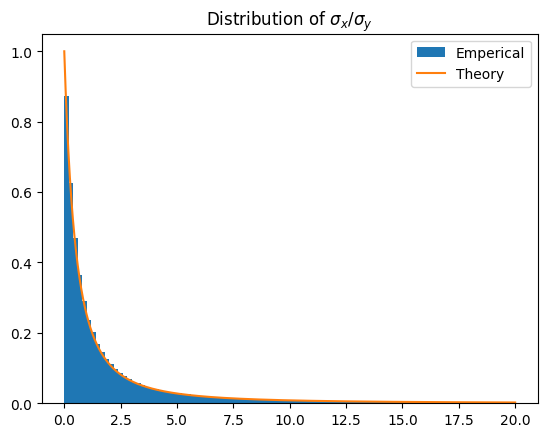

In [344]:
_ = plt.hist(Z, label="Emperical", density=True, bins=100)
plt.plot(x, y, label="Theory")
plt.title(r"Distribution of $\sigma_x/\sigma_y$")
plt.legend()

In [345]:
def MI_dist(x, lamx=lamx, lamy=lamy):
    p1 = lamx*lamy
    p2 = (lamx*(2**x - 1) + lamy)**-2
    p3 = np.log(2)*2**x
    
    return p1*p2*p3

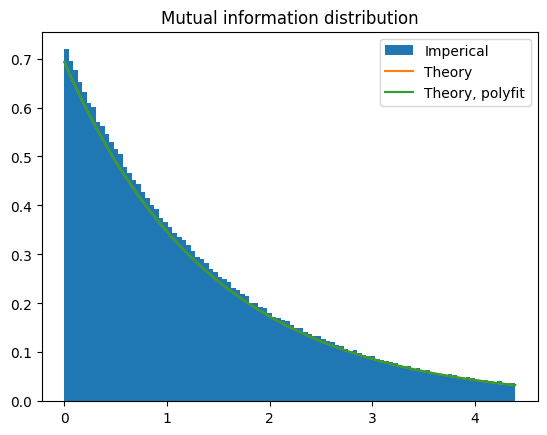

In [357]:
MI = np.log2(1 + Z)
MI_range = np.linspace(np.min(MI), np.max(MI), 1000)
MI_theory = MI_dist(MI_range)

plt.hist(MI, density=True, bins=100, label="Imperical")
plt.plot(MI_range, MI_theory, label="Theory")
plt.legend()
plt.title("Mutual information distribution")
plt.show()